In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_center_dataset(filename):
    dataset = np.load(filename)

    return dataset - np.mean(dataset, axis = 0)

In [3]:
x = load_and_center_dataset('YaleB_32x32.npy')
len(x)

2414

In [4]:
len(x[0])

1024

In [5]:
np.average(x)

-8.315174931741023e-17

In [6]:
def get_covariance(dataset):
    n = len(dataset)
    covariance = np.dot(np.transpose(dataset), dataset)
    
    return covariance * (1/(n-1))

In [7]:
co = get_covariance(x)
len(co)

1024

In [8]:
len(co[0])

1024

In [9]:
def get_eig(S, m):
    evalue, evector = eigh(S, subset_by_index= [len(S) - m,len(S) - 1])
    diagonal = np.diag(evalue)
    return np.flip(diagonal), np.flip(evector, axis=1)

In [10]:
Lambda, U = get_eig(co, 2)
print(Lambda)

[[1369142.41612494       0.        ]
 [      0.         1341168.50476773]]


In [11]:
print(U)

[[-0.01304065 -0.0432441 ]
 [-0.01177219 -0.04342345]
 [-0.00905278 -0.04095089]
 ...
 [ 0.00148631  0.03622013]
 [ 0.00205216  0.0348093 ]
 [ 0.00305951  0.03330786]]


In [12]:
def get_eig_perc(S, perc):
    evalue, evector = eigh(S)
    evalue = np.flip(evalue)
    evector = np.flip((evector), axis=1)
    evector = np.transpose(evector)
    
    sum = 0
    for i in evalue:
        sum += i
    
    cer_perc_evalues = []
    cer_perc_evectors = []
    
    for val, vector in zip(evalue,evector):
        if val/sum > perc:
            cer_perc_evalues.append(val)
            cer_perc_evectors.append(vector)
        
    
    diagonal = np.diag(np.asarray(cer_perc_evalues))
    return diagonal, np.transpose(np.asarray(cer_perc_evectors))

In [13]:
Lambda, U = get_eig_perc(co, 0.07)
print(Lambda)

[[1369142.41612494       0.        ]
 [      0.         1341168.50476773]]


In [14]:
print(U)

[[-0.01304065 -0.0432441 ]
 [-0.01177219 -0.04342345]
 [-0.00905278 -0.04095089]
 ...
 [ 0.00148631  0.03622013]
 [ 0.00205216  0.0348093 ]
 [ 0.00305951  0.03330786]]


In [15]:
def project_image(img, U):
    sum = 0
    for vector in np.transpose(U):
        alpha = np.dot(np.transpose(vector), img)
        sum += np.dot(alpha, vector)
    return sum

In [16]:
print(project_image(x[0], U))

[6.84122225 4.83901287 1.41736694 ... 8.75796534 7.45916035 5.4548656 ]


In [17]:
def display_image(orig, proj):
    reshape_orig = np.transpose(orig.reshape((32, 32)))
    reshape_proj = np.transpose(proj.reshape((32, 32)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,3))
    ax1.set_title('Original')
    ax2.set_title('Projection')
    
    axes_orig = ax1.imshow(reshape_orig, aspect = 'equal')
    orig_cbar = fig.colorbar(axes_orig, ax=ax1)
    
    axes_proj = ax2.imshow(reshape_proj, aspect = 'equal')
    proj_cbar = fig.colorbar(axes_proj, ax=ax2)
    
    plt.show()

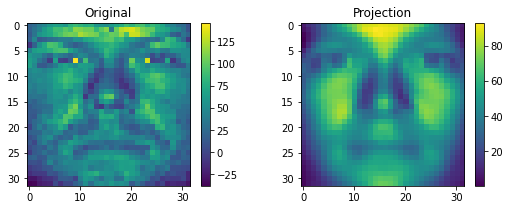

In [18]:
projection = project_image(x[0], U)
display_image(x[0], projection)